In [1]:
!pip install tensorflow-cpu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [8]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('pima-indians-diabetes.data (1).csv', names=names)

In [9]:
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
df.shape

(768, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
df[df.duplicated()].shape

(0, 9)

In [14]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
X = df.iloc[:,0:8]
Y = df['class']

In [16]:
X

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state= 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, ReLU, PReLU
from keras.layers import Dropout

In [23]:
classifier = Sequential()

In [25]:
# add input layers
classifier.add(Dense(units=11, activation='relu'))

In [29]:
# add first hidden layers
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [30]:
# add second hidden layers
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [31]:
# add output layers
classifier.add(Dense(1,activation='sigmoid'))

In [35]:
# optimizers
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [36]:
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
# Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)
# monitor = Quantity to be monitored.
# min-delta = Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
# patience = Number of epochs with no improvement after which training will be stopped.
# Verbose = Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.
# mode = One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
# baseline = Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.


In [39]:
model_history = classifier.fit(x_train, y_train, validation_split = 0.33, batch_size=10, epochs=50, callbacks=early_stopping)

Epoch 1/50
36/36 [==============================] - 3s 11ms/step - loss: 0.6644 - accuracy: 0.6407 - val_loss: 0.6211 - val_accuracy: 0.6629
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 0.5903 - accuracy: 0.7214 - val_loss: 0.5291 - val_accuracy: 0.7809
Epoch 3/50
36/36 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7409 - val_loss: 0.5261 - val_accuracy: 0.7416
Epoch 4/50
36/36 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.7716 - val_loss: 0.5073 - val_accuracy: 0.7753
Epoch 5/50
36/36 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7772 - val_loss: 0.5260 - val_accuracy: 0.7584
Epoch 6/50
36/36 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.7883 - val_loss: 0.5229 - val_accuracy: 0.7697
Epoch 7/50
36/36 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7772 - val_loss: 0.5207 - val_accuracy: 0.7416
Epoch 8/50
36/36 [=

In [41]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


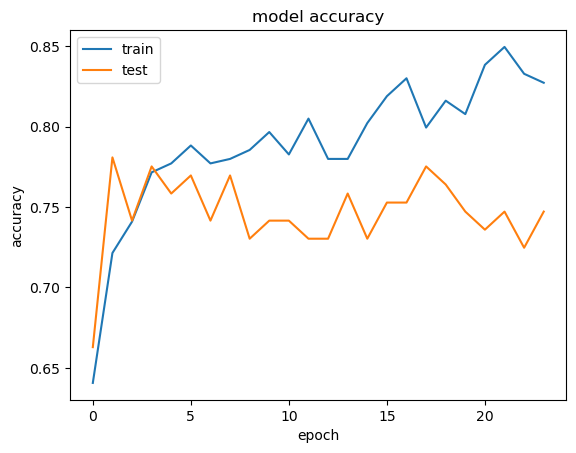

In [42]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

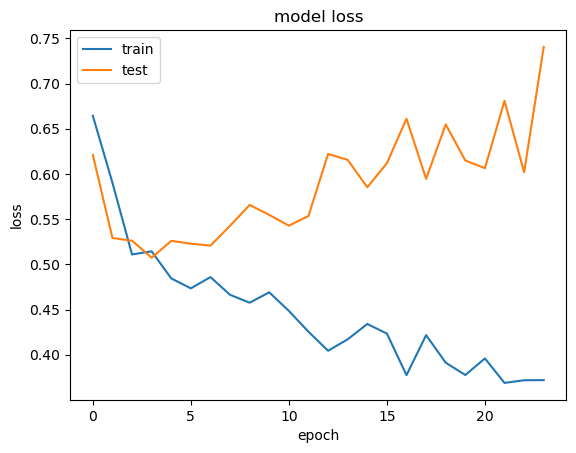

In [43]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

8/8 [==============================] - 0s 1ms/step


In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[124,  33],
       [ 28,  46]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [53]:
print(score*100)

73.59307359307358
